<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_DNN_MLP_Tree_Knn_Ensemble_cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [392]:
!git clone https://github.com/caplove/DX_team_4_repo.git

fatal: destination path 'DX_team_4_repo' already exists and is not an empty directory.


In [393]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [394]:
#Image('./image/image_02.jpg',width=800,height=700)

In [395]:
#Image('./image/image_03.jpg',width=800,height=700)

In [396]:
#Image('./image/image_05.jpg',width=800,height=700)

In [397]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.interpolate import CubicSpline      # for Data Augmentation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 프레임

In [398]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 txt 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서  . 앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//shirt_4.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//coat_4.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//shirt_3.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//suit_4.txt


In [399]:
df.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,0.0,0.0,1.0,0.18,1.04,-1.46,-0.02,idle
1,0.0,-0.0,1.0,0.24,0.98,-1.46,-0.02,idle
2,0.0,-0.0,1.0,0.06,1.04,-1.28,-0.06,idle
3,0.0,-0.0,1.0,-0.06,0.98,-1.40,-0.09,idle
4,0.0,-0.0,1.0,0.06,1.10,-1.34,0.01,idle


In [400]:
df.tail()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
14689,-0.01,0.07,1.05,-1.28,1.28,-1.28,-0.57,suit_4
14690,-0.00,0.02,0.86,2.44,0.98,-1.46,-0.64,suit_4
14691,-0.00,-0.04,1.11,0.12,1.04,-1.22,-0.06,suit_4
14692,0.01,0.02,0.91,-0.55,1.16,-1.40,0.94,suit_4
14693,0.01,-0.05,1.06,-0.61,1.28,-1.40,-0.06,suit_4


In [401]:
df.describe()

,accx,accy,accz,gyrx,gyry,gyrz,current
count,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000
mean,-0.000210,-0.000524,0.998872,0.263806,1.062795,-1.314019,0.084912
std,0.018129,0.035233,0.059794,1.455410,0.179769,0.192238,0.619515
min,-0.180000,-0.190000,0.570000,-15.630000,0.060000,-2.140000,-3.630000
25%,-0.010000,-0.020000,0.970000,-0.550000,0.980000,-1.400000,-0.480000
50%,0.000000,-0.000000,1.000000,0.240000,1.040000,-1.280000,0.070000
75%,0.010000,0.020000,1.030000,1.040000,1.160000,-1.220000,0.650000
max,0.140000,0.220000,1.440000,15.560000,2.320000,-0.430000,1.810000


## x,y 정의

In [402]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

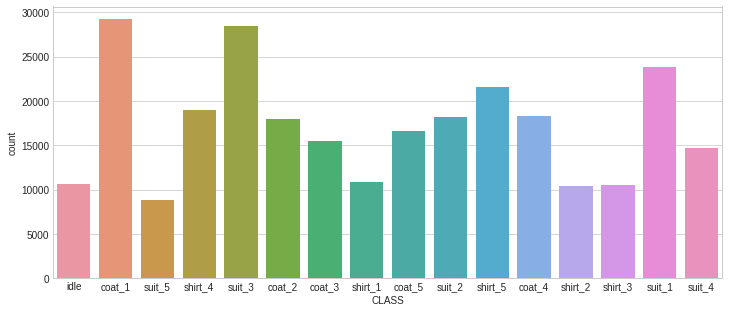

In [403]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

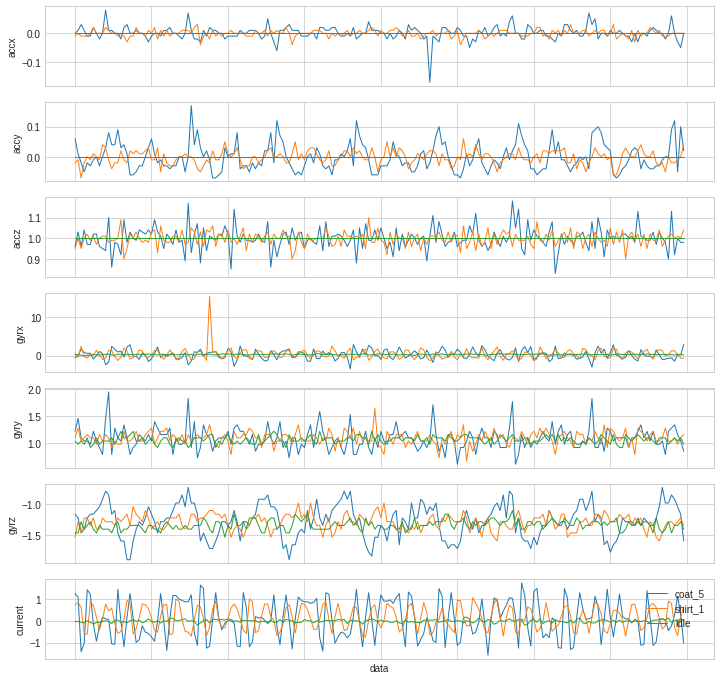

In [404]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [405]:
#Image('./image/image_06.jpg')

># 데이터 클린징

>>## Kalman Filter

In [406]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [669]:
# Input parameters.
time_end = 500
dt = 1

In [670]:
# Initialization for system model.
A = 0.8   # 시간에 따라 상태 변환            Xk+1 = A*Xk + wk   (X: 예측값)
H = 0.8   # 상태를 측정값으로 변환           Zk   = H*Xk + vx   (Z: 측정값)
Q = 0.05   # 예측값의 분산
R = 0.1  # 측정값의 분산
# Initialization for estimation.
x_0 = 0  # 14 for book.
P_0 = 0.1

In [671]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [690]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = np.array(x['current'])[i+22000]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

Text(0, 0.5, 'current[A]')

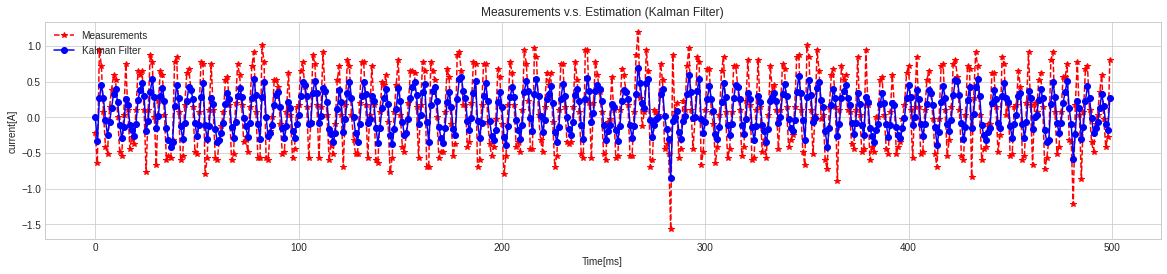

In [691]:
plt.figure(figsize=(20,4))
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time[ms]')
plt.ylabel('current[A]')
#plt.savefig('png/simple_kalman_filter.png')

# **전처리**

---





>## Scaler 

In [310]:
"""전처리 / 데이터 증강 """
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

>## Data Augmentation


>>>### *jittering*

In [311]:
seed_no = 2022
np.random.seed(seed = seed_no)

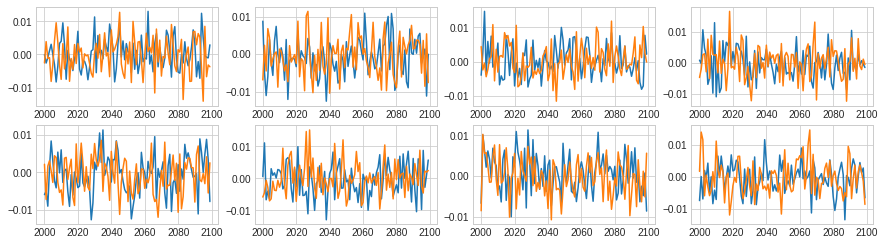

In [312]:
"""jittering"""
sigma = 0.005

def DA_Jitter(X, sigma=sigma):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + myNoise

x_in_jittering = DA_Jitter(x,sigma)

# sample
#x_sample = x.loc[:,'accx':'accz']    # array에서 slicing  
x_sample = x.iloc[2000:2100,0:2]             # pd DataFrame에서 slicing은 .loc(인덱스기반) 또는 .iloc(위치기반) 써야함.
# print(x.shape,x_in.shape)

# x 전체 데이터에 jittering


fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
    ax.plot(DA_Jitter(x_sample,sigma))

>>>### *Magnitude Warping*

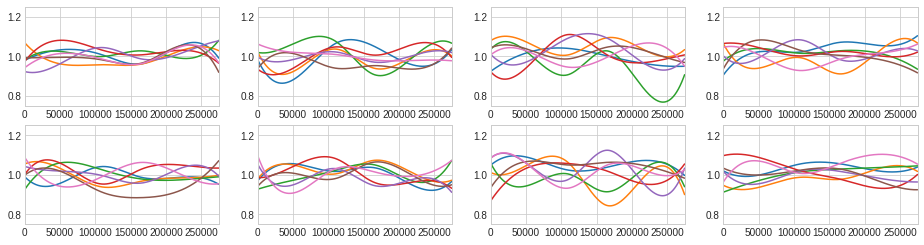

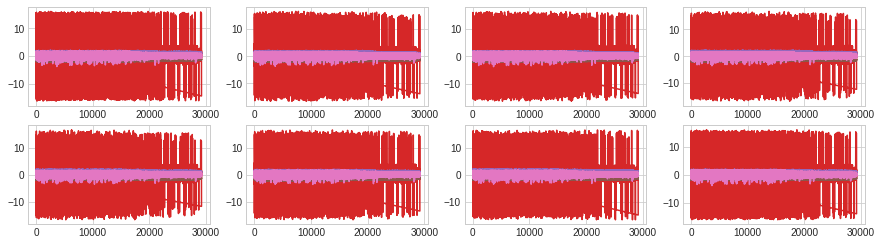

In [313]:
"""Magnitude Warping"""
sigma = 0.05  # default 0.2  (standard deviation)
knot = 4      # default 4   (should be integer)
#seed_no = 2022

## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=sigma, knot=4):
    #np.random.seed(seed = seed_no)
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    cs_a = CubicSpline(xx[:,3], yy[:,3])  # 추가
    cs_b = CubicSpline(xx[:,4], yy[:,4])  # 추가
    cs_c = CubicSpline(xx[:,5], yy[:,5])  # 추가
    cs_i = CubicSpline(xx[:,6], yy[:,6])  # 추가
    
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_i(x_range)]).transpose()



## Random curves around 1.0
fig = plt.figure(figsize=(16,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(GenerateRandomCurves(x.iloc[:,0:3], sigma))
    ax.plot(GenerateRandomCurves(x, sigma, knot))

    plt.axis([0,x.shape[0],0.75,1.25])

def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(DA_MagWarp(x.iloc[:,0:3], sigma))
    ax.plot(DA_MagWarp(x,sigma))

    # ax.set_xlim([0,20000])
    # ax.set_ylim([-5,5])    
    

In [314]:
# x 전체 데이터에 Magnitude Warp
x_in_MagWarp = DA_MagWarp(x,sigma)

>>>### *Scaling*

In [315]:
"""Scaling"""
sigma = 0.05

def DA_Scaling(X, sigma=sigma):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise

x_in_Scaling = DA_Scaling(x,sigma)    

>>>### *Combination*

In [316]:
"""Combination"""
sigma1 = 0.05
sigma2 = 0.01

x_in_Combination = DA_Jitter(DA_Scaling(x,sigma1),sigma2)    

In [317]:
"""Augmentation 결과 적용 list"""
# default
#x_list=[x]

# jittering / MagWarp / Scaling / Combination
x_list=[x, x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination]

print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)

(274582, 7) (274582, 7) (274582, 7) (274582, 7) (274582, 7) (274582,)


# **특징추출**
---

>>## MFCC

In [318]:
"""전처리 / 특징 추출 """
"""MFCC"""
#Image('./image/image_09.jpg', width=400, height=100)   # https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sooftware&logNo=221661644808

'MFCC'

In [319]:
"""library"""
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

"""변수정의"""
fs=100
no_of_data=400
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

features_all=pd.DataFrame()

"""함수정의"""
# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


In [320]:

#class_list=np.array(['coat_5','shirt_1'])
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])
features_all=pd.DataFrame()

for ii in x_list:
# 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.

# chunk
    for i in class_list:       # class별로 'idle', 'suit1', ....
        idx_class = y == i
        x_in, count = list_chunk(ii['accx'][idx_class],no_of_data)   # x 400ea
        y_in, count = list_chunk(ii['accy'][idx_class],no_of_data)   # y 400ea
        z_in, count = list_chunk(ii['accz'][idx_class],no_of_data)   # z 400ea
        current_in, count = list_chunk(ii['current'][idx_class],no_of_data)   # current 400ea 
        class_in,count = list_chunk(y[idx_class],no_of_data)   # label
        print("class:", i, "    chunk개수:",count)  # class별 chunked 개수 확인
    
# mfcc & merge
        for j in range(0,count-1):    # 클래스 내의 j번째 chunk
            # mfcc
            x_in_chunk = np.array(x_in[j])
            y_in_chunk = np.array(y_in[j])
            z_in_chunk = np.array(z_in[j])
            current_in_chunk = np.array(current_in[j])
            #print(x_in_chunk.shape)            # (400,)
            mfccs_x_chunk = librosa.feature.mfcc(x_in_chunk, sr=fs, n_mfcc=13)
            mfccs_y_chunk = librosa.feature.mfcc(y_in_chunk, sr=fs, n_mfcc=13)
            mfccs_z_chunk = librosa.feature.mfcc(z_in_chunk, sr=fs, n_mfcc=13)
            mfccs_current_chunk = librosa.feature.mfcc(current_in_chunk, sr=fs, n_mfcc=13)
            #print(x_in_chunk.shape, mfccs_x_chunk.shape)         # (13,1)
 
            # class
            class_in_chunk = class_in[0]
 
            # features merge
            features_chunk = np.concatenate((mfccs_x_chunk,mfccs_y_chunk,mfccs_y_chunk,mfccs_current_chunk),axis=0)
        
            #features + class
            features_chunk = pd.DataFrame(features_chunk).T
            features_chunk['class']=class_in_chunk
            #features_chunk['class']=class_location
        
            #print(features_chunk.head())
            features_all = pd.concat([features_all,features_chunk],axis=0)

class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class:

In [321]:
"""전처리 후 데이터 구조"""
features_all.shape

(3310, 53)

In [322]:
features_all.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [323]:
features_all.tail()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,94.105954,8.609844,5.306579,-0.753743,2.297068,-6.582664,-2.119639,1.241277,0.082519,2.218078,-1.988476,-1.127027,-1.342625,118.095165,6.813057,12.639810,7.744950,-2.603677,-4.656384,-7.054553,-2.844827,-4.333064,-2.155210,-0.605705,-11.511070,-4.304980,118.095165,6.813057,12.639810,7.744950,-2.603677,-4.656384,-7.054553,-2.844827,-4.333064,-2.155210,-0.605705,-11.511070,-4.304980,386.241107,23.969566,-5.501712,8.138294,15.673833,6.248684,-7.691337,-9.352856,-3.394002,12.215736,8.395872,-10.475587,-19.387353,coat_5
0,96.981914,9.586429,15.548528,-1.522375,-1.269769,-2.892548,-8.480268,1.589746,1.090993,3.058237,-3.120306,5.249726,-0.600009,107.670758,3.943389,7.664163,5.548807,-2.354296,-2.342665,-3.793316,-13.458206,-11.492621,-1.498893,-2.254642,0.219144,-7.621570,107.670758,3.943389,7.664163,5.548807,-2.354296,-2.342665,-3.793316,-13.458206,-11.492621,-1.498893,-2.254642,0.219144,-7.621570,389.048665,23.816952,-15.730236,4.374946,18.117832,3.254538,0.237026,-5.012518,-0.793845,5.855984,3.931911,-12.285590,-18.510875,coat_5
0,87.029521,8.879945,-1.473914,-0.321811,-1.496421,-4.724845,-6.917951,-0.522831,-2.978405,-4.194163,0.228542,2.315990,-1.393198,108.907822,7.577845,14.192558,-3.573171,-4.707799,-3.069281,-3.843754,-7.681433,-8.446418,-0.937235,0.512817,-9.277314,-1.822013,108.907822,7.577845,14.192558,-3.573171,-4.707799,-3.069281,-3.843754,-7.681433,-8.446418,-0.937235,0.512817,-9.277314,-1.822013,389.645955,26.300402,-10.342661,2.528600,17.680726,-0.625389,-6.467637,-6.237528,-9.260788,11.137738,3.770193,-17.864834,-15.083058,coat_5
0,97.769819,4.665679,3.987219,-1.455128,-3.793221,0.440859,-3.432516,-1.393337,-5.448755,6.770731,1.590401,5.449396,0.785549,122.845470,4.883014,4.009938,3.769722,-3.971567,-3.044036,-5.371033,-11.256236,-9.515484,-2.055478,3.390674,-6.015889,-5.419774,122.845470,4.883014,4.009938,3.769722,-3.971567,-3.044036,-5.371033,-11.256236,-9.515484,-2.055478,3.390674,-6.015889,-5.419774,382.638022,22.896025,-9.707163,4.037399,14.122271,-3.053830,-10.614257,-1.118219,0.607049,6.918268,0.303394,-3.651266,-11.218250,coat_5
0,108.037542,-1.313247,1.283559,3.536033,-3.259295,-2.621297,-6.255321,-0.072916,-1.483441,2.469212,1.270090,0.627311,4.093323,107.873701,2.848389,9.716448,7.547057,3.430446,4.471994,-2.124681,-7.971657,-6.354955,2.985101,1.681246,-4.572535,-15.339086,107.873701,2.848389,9.716448,7.547057,3.430446,4.471994,-2.124681,-7.971657,-6.354955,2.985101,1.681246,-4.572535,-15.339086,391.488309,14.274252,-16.775735,4.795319,13.985631,2.287910,-10.104828,-1.309559,-4.253163,2.620018,3.966151,-11.235945,-14.876753,coat_5


In [324]:
features_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000
mean,33.269588,1.307614,2.348891,-0.161245,-3.035311,-4.073581,-3.396732,-3.332979,-2.056221,-0.159733,1.618179,1.310230,0.276079,67.857117,1.767682,5.455284,0.859003,-3.157376,1.781964,-6.178464,-8.234654,-5.276102,-0.453322,1.247763,-2.630830,-3.378441,67.857117,1.767682,5.455284,0.859003,-3.157376,1.781964,-6.178464,-8.234654,-5.276102,-0.453322,1.247763,-2.630830,-3.378441,352.647117,32.470064,-14.288263,-12.724333,-3.644232,2.403016,-0.394786,-0.510626,2.710812,1.537708,-4.472012,-5.780672,-4.094914
std,179.858319,7.154957,4.762584,4.228752,3.973711,4.230762,3.561119,3.665943,3.519427,3.806014,3.849834,3.410683,3.793346,185.301161,5.813510,4.379209,4.191914,4.124782,5.687621,3.824962,3.630787,3.392183,3.524515,3.801288,3.918180,3.884896,185.301161,5.813510,4.379209,4.191914,4.124782,5.687621,3.824962,3.630787,3.392183,3.524515,3.801288,3.918180,3.884896,33.003214,9.000836,8.370173,10.108348,9.266177,5.260525,6.120866,4.225769,4.653149,7.023551,6.560790,7.407300,9.182451
min,-1131.370850,-20.011074,-12.812237,-20.164857,-16.150619,-22.158465,-16.790667,-15.626439,-12.676041,-13.381857,-11.154761,-10.256186,-12.757165,-1131.370850,-20.957126,-12.457545,-13.790161,-18.692124,-14.842226,-20.388093,-19.148447,-16.789230,-14.080318,-11.557071,-13.147051,-19.284280,-1131.370850,-20.957126,-12.457545,-13.790161,-18.692124,-14.842226,-20.388093,-19.148447,-16.789230,-14.080318,-11.557071,-13.147051,-19.284280,194.429335,-7.556298,-43.695663,-33.576741,-28.810185,-18.025153,-18.672745,-11.791473,-11.792145,-18.770334,-20.495686,-25.034881,-24.912691
25%,33.416097,-3.659715,-0.775160,-2.901904,-5.625996,-6.715907,-5.671990,-5.800953,-4.442633,-2.639971,-0.736359,-1.056462,-2.205518,72.105528,-1.855123,2.430200,-1.821364,-5.723741,-2.560279,-8.714931,-10.605782,-7.678487,-2.772193,-1.209880,-5.419456,-5.984123,72.105528,-1.855123,2.430200,-1.821364,-5.723741,-2.560279,-8.714931,-10.605782,-7.678487,-2.772193,-1.209880,-5.419456,-5.984123,339.941252,28.321159,-18.904354,-20.558756,-9.834851,-0.673373,-4.669298,-3.489179,-0.608259,-3.636698,-9.644233,-11.054088,-11.887291
50%,57.413008,0.449220,2.222495,0.000000,-3.156993,-3.958920,-3.403487,-3.353724,-1.935252,-0.052539,1.518311,1.253755,0.304493,97.972874,1.651018,5.189708,0.998939,-3.213732,1.785308,-6.283865,-8.338173,-5.265981,-0.421019,1.098583,-2.598789,-3.676111,97.972874,1.651018,5.189708,0.998939,-3.213732,1.785308,-6.283865,-8.338173,-5.265981,-0.421019,1.098583,-2.598789,-3.676111,355.377245,33.615388,-13.622504,-14.407941,-5.351789,2.488571,0.111754,-0.796160,2.608108,1.754148,-5.097744,-6.448280,-3.634636
75%,85.350422,5.724378,5.701676,2.675391,-0.299703,-1.179112,-0.823541,-0.706124,0.137863,2.369322,4.046155,3.573959,2.778040,113.814386,5.425420,8.358254,3.779555,-0.280953,6.043952,-3.800828,-6.250958,-2.879115,2.012876,3.789677,0.000000,-0.581335,113.814386,5.425420,8.358254,3.779555,-0.280953,6.043952,-3.800828,-6.250958,-2.879115,2.012876,3.789677,0.000000,-0.581335,372.100681,38.180529,-8.956847,-5.982509,1.191000,5.562029,3.708538,2.196148,5.793618,6.266020,0.496223,-0.619202,3.660018
max,122.972135,25.969276,17.038185,11.986751,11.382401,7.941045,8.443429,12.485708,11.998049,11.532761,15.157634,12.840

# **모형 설계/훈련/평가**
---

>>>### x,y 정의 (features 기반)

>>## DNN

In [325]:
"""x,y 정의"""
x=features_all.drop('class',axis=1)
y=features_all['class']

"""class를 숫자로 변환 for pytorch"""
y_number=[]
for i in y:
    y_tmp=(np.where(i == class_list))[0][0]    # [0][0] 추가해서 데이터만 추출
    #print (i,y_tmp)
    y_number.append(y_tmp)
    #print(i,y_tmp[0][0])

y=np.array(y_number).reshape(-1,)
y=pd.Series(y)

In [326]:
# 데이터 shape check  (AAA,00) (000,)
print(x.shape,y.shape)

(3310, 52) (3310,)


In [327]:
display(x.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [328]:
"""데이터셑 나누기"""
# train, test
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.2)
# train, validation
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2)
print(f"학습 데이터셋 크기 : {train_x.shape}, 검증 데이터셋 크기 : {valid_x.shape}, 테스트 데이터셋 크기 : {test_x.shape}")

학습 데이터셋 크기 : (2118, 52), 검증 데이터셋 크기 : (530, 52), 테스트 데이터셋 크기 : (662, 52)


In [329]:
"""scaler"""
scaler=StandardScaler()
scaler.fit(train_x)
train_x = pd.DataFrame(scaler.transform(train_x))
valid_x = pd.DataFrame(scaler.transform(valid_x))
test_x = pd.DataFrame(scaler.transform(test_x))

In [330]:
pd.DataFrame(train_x, columns = x.columns).describe()
#평균과 STD 확인

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03,2.118000e+03
mean,-2.717897e-17,-1.887065e-18,1.820231e-17,-3.878966e-17,-3.173938e-17,-3.127810e-16,3.931385e-20,5.685765e-18,7.131532e-17,-1.402194e-17,1.079820e-17,5.116042e-17,2.691688e-17,-3.379680e-17,1.176958e-18,-1.543724e-17,-1.894927e-17,3.187042e-17,-7.810351e-18,-2.085731e-16,5.241846e-18,-1.362880e-18,2.558021e-17,3.483207e-17,-5.462004e-17,4.463432e-17,-3.379680e-17,1.176958e-18,-1.543724e-17,-1.894927e-17,3.187042e-17,-7.810351e-18,-2.085731e-16,5.241846e-18,-1.362880e-18,2.558021e-17,3.483207e-17,-5.462004e-17,4.463432e-17,1.067764e-15,-2.141294e-16,1.223447e-16,3.920901e-17,-4.948303e-17,-4.507988e-18,1.396952e-17,-6.302665e-17,-1.362880e-18,-2.201575e-17,-7.808385e-17,-5.325716e-17,1.923758e-17
std,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00,1.000236e+00
min,-6.687486e+00,-2.980934e+00,-3.181728e+00,-4.698857e+00,-3.288127e+00,-4.355363e+00,-3.554379e+00,-3.365455e+00,-3.013817e+00,-3.461361e+00,-3.354510e+00,-3.330646e+00,-3.406666e+00,-6.682517e+00,-3.839462e+00,-4.060362e+00,-3.490201e+00,-3.765545e+00,-2.929582e+00,-3.703356e+00,-3.006823e+00,-2.936755e+00,-3.681504e+00,-3.426577e+00,-2.685284e+00,-4.011406e+00,-6.682517e+00,-3.839462e+00,-4.060362e+00,-3.490201e+00,-3.765545e+00,-2.929582e+00,-3.703356e+00,-3.006823e+00,-2.936755e+00,-3.681504e+00,-3.426577e+00,-2.685284e+00,-4.011406e+00,-4.770000e+00,-4.427358e+00,-3.436092e+00,-2.061351e+00,-2.739908e+00,-3.904803e+00,-3.010618e+00,-2.663545e+00,-3.109078e+00,-2.855753e+00,-2.456982e+00,-2.549024e+00,-2.277672e+00
25%,-9.761341e-03,-6.976169e-01,-6.553736e-01,-6.227385e-01,-6.675753e-01,-6.364915e-01,-6.590062e-01,-6.909664e-01,-6.786017e-01,-6.527039e-01,-6.159793e-01,-6.930480e-01,-6.504016e-01,1.684347e-02,-6.312297e-01,-6.783624e-01,-6.168513e-01,-6.345220e-01,-7.714588e-01,-6.551272e-01,-6.498934e-01,-7.005523e-01,-6.562405e-01,-6.513378e-01,-6.849690e-01,-6.635883e-01,1.684347e-02,-6.312297e-01,-6.783624e-01,-6.168513e-01,-6.345220e-01,-7.714588e-01,-6.551272e-01,-6.498934e-01,-7.005523e-01,-6.562405e-01,-6.513378e-01,-6.849690e-01,-6.635883e-01,-3.691838e-01,-4.597873e-01,-5.583855e-01,-7.700506e-01,-6.675741e-01,-5.759940e-01,-7.021649e-01,-6.904391e-01,-6.991461e-01,-7.350725e-01,-7.829137e-01,-7.094055e-01,-8.502035e-01
50%,1.290037e-01,-1.104611e-01,-5.738228e-03,5.368252e-02,-3.865500e-02,1.770679e-02,2.083602e-03,-3.272731e-03,3.589502e-02,2.516854e-02,-2.115325e-02,-2.584571e-02,3.031924e-02,1.558642e-01,-1.752712e-02,-5.583002e-02,3.704019e-02,-1.168459e-02,2.504697e-03,-3.560036e-02,-3.554089e-02,-2.298229e-02,5.231033e-04,-4.34

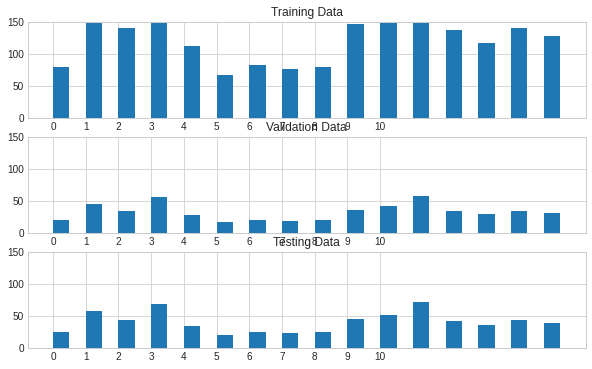

In [331]:
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.hist(train_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Training Data')

plt.subplot(312)
plt.hist(valid_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Validation Data')

plt.subplot(313)
plt.hist(test_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Testing Data')
plt.show()

>>>### 분류기 모형

In [332]:
"""분류기 모형 설정"""

"""DNN"""
'''Neural Network을 위한 딥러닝 모듈'''
import torch             # 딥러닝 모듈이고, 로컬에서는  설치필요
import copy
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

''' 결과 평가용 모듈 '''
from sklearn.metrics import accuracy_score, confusion_matrix
    
''' 기타 optional'''
import warnings, itertools
warnings.filterwarnings(action='ignore')


#https://colab.research.google.com/drive/1kt8Zmy-qiE4mhcgBrFUAzdBmVh9UVyGK#scrollTo=1ed897f1
train_x_torch = torch.FloatTensor(train_x.values) # torch.FloatTensor(numpy)
train_y_torch = torch.LongTensor(train_y.values) # torch.LongTensor(numpy)
trainDataset = torch.utils.data.TensorDataset(train_x_torch, train_y_torch)
trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                         batch_size = 100,
                                         shuffle = True)

# 검증에는 shuffle 하지 않음.  w 찾는게 아님.
valid_x_torch = torch.FloatTensor(valid_x.values) # torch.FloatTensor(numpy)
valid_y_torch = torch.LongTensor(valid_y.values) # torch.LongTensor(numpy)
validDataset = torch.utils.data.TensorDataset(valid_x_torch, valid_y_torch)
validLoader = torch.utils.data.DataLoader(dataset = validDataset,
                                        batch_size = 100,
                                        shuffle = False)

test_x_torch = torch.FloatTensor(test_x.values) # torch.FloatTensor(numpy)
test_y_torch = torch.LongTensor(test_y.values) # torch.LongTensor(numpy)
testDataset = torch.utils.data.TensorDataset(test_x_torch, test_y_torch)
testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = 100,
                                        shuffle = False)

In [333]:
# 모형
class DNNClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):    # 모델 구조 정의
        # input_dim = 784, output_dim = 10 (클래스 개수)
        super().__init__()
        
        ''' 모델 구조 만들기'''
        # CNN, RNN, LSTM등은 linear가 아니다.
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim1) # input_dim(784) -> hidden_dim1(500)
        self.linear2 = torch.nn.Linear(hidden_dim1, hidden_dim2) # hidden_dim1(500) -> hidden_dim2(300)
        self.linear3 = torch.nn.Linear(hidden_dim2, hidden_dim3) # hidden_dim2(300) -> hidden_dim3(100)
        self.linear4 = torch.nn.Linear(hidden_dim3, output_dim) # hidden_dim3(100) -> output_dim(10)
        
        self.relu = torch.nn.ReLU() # Relu activation function
        self.dropout = torch.nn.Dropout(p=0.5)     # p = 0.5는 확률개념으로 50% 는 w 를 업데이트 하지 않음. overfit 방지
        
    def forward(self, x):                                                                # 순서, Sequence 정의
        
        ''' 짜여진 모델에 설명 변수 데이터 x를 입력할 때 진행할 순서 설정'''

        x = self.linear1(x) 
        x = self.relu(x) 
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)     # 반절만 활성화
        x = self.linear3(x)
        x = self.relu(x)
        output = self.linear4(x) 
        
        return output

In [334]:
#모델 및 비용함수, Solver 설정
print(train_x.shape[1],train_y.nunique())

52 16


In [335]:
# 빈 모델 생성
clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, train_y.nunique())  # features개수, Hidden Layer1, Hidden Layer2, Hidden Layer3, class 개수

In [336]:
# 비용함수 정의
criterion = torch.nn.CrossEntropyLoss()

# Solver 설정
# 경사하강법의 종류 정의 (adam)
solver = torch.optim.Adam(clf_DNN.parameters(), lr = 0.001)

>>>### 훈련 / 검증

In [337]:
num_epochs = 100

print("Start Training !")
print('-'*50)

# 빈 공간 할당
train_loss_total = []
valid_loss_total = []
best_loss = np.inf


# 
for epoch in range(num_epochs):
    #초기값  
    train_loss = 0
    valid_loss = 0
    
    ''' Training '''
    clf_DNN.train()
    for x_data, y_data in trainLoader:          # trainLoader로 구성해놨던 데이터 가져옴.
        
        # 정확한 학습을 위하여 모든 기울기 값을 0으로 설정
        solver.zero_grad()
        
        y_pred = clf_DNN(x_data)
        
        # 비용함수를 활용하여 오차 계산
        loss = criterion(y_pred, y_data)
        
        # 계산된 오차를 기반으로, 오차를 줄일 수 있는 방향으로 w값 업데이트  (즉, backpropagation !)
        loss.backward()
        solver.step() # forward evaluation, backward propagation, update를 모두 포함하는 step

        train_loss += loss.item()
    
    ''' Validation '''
    clf_DNN.eval()
    for eval_x_data, eval_y_data in validLoader:
        eval_y_pred = clf_DNN(eval_x_data)
        valid_loss += criterion(eval_y_pred, eval_y_data).item() # 딕셔너리에 있는 키와 값들의 쌍을 얻어 저장



    """ 결과출력"""    
    print('[%d epoch] Train loss : %.3f, Valid loss : %.3f' % (epoch+1, train_loss/len(trainLoader), valid_loss/len(validLoader)))
    
    if valid_loss/len(validLoader) < best_loss:
        # 로스값 업데이트
        best_loss = valid_loss/len(validLoader)        # validation loss 값이 점점줄다가 다시커지게 되므로 가장적었을때의 epoch와 파라미터 w를 기억해둔다.
        # 최적의 epoch 수와 모델 저장하기
        best_epoch = epoch
        best_model = clf_DNN.state_dict()
    
    train_loss_total.append(train_loss/len(trainLoader))
    valid_loss_total.append(valid_loss/len(validLoader))
    
print('-'*50)
print("Finished Training ! Best Epoch is epoch %d." % (best_epoch+1))

Start Training !
--------------------------------------------------
[1 epoch] Train loss : 2.231, Valid loss : 1.316
[2 epoch] Train loss : 0.917, Valid loss : 0.534
[3 epoch] Train loss : 0.468, Valid loss : 0.309
[4 epoch] Train loss : 0.297, Valid loss : 0.221
[5 epoch] Train loss : 0.231, Valid loss : 0.162
[6 epoch] Train loss : 0.172, Valid loss : 0.139
[7 epoch] Train loss : 0.137, Valid loss : 0.117
[8 epoch] Train loss : 0.104, Valid loss : 0.116
[9 epoch] Train loss : 0.096, Valid loss : 0.079
[10 epoch] Train loss : 0.069, Valid loss : 0.076
[11 epoch] Train loss : 0.064, Valid loss : 0.072
[12 epoch] Train loss : 0.046, Valid loss : 0.076
[13 epoch] Train loss : 0.048, Valid loss : 0.077
[14 epoch] Train loss : 0.037, Valid loss : 0.059
[15 epoch] Train loss : 0.035, Valid loss : 0.066
[16 epoch] Train loss : 0.028, Valid loss : 0.065
[17 epoch] Train loss : 0.021, Valid loss : 0.056
[18 epoch] Train loss : 0.021, Valid loss : 0.058
[19 epoch] Train loss : 0.020, Valid loss

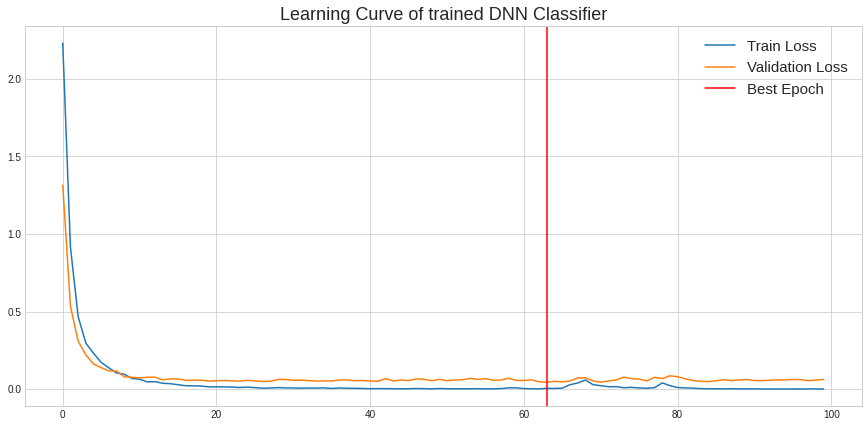

In [338]:
# learning Curve
plt.figure(figsize=(15,7))

# 학습 및 검증 로스 변동 관찰하기
plt.plot(train_loss_total,label='Train Loss')
plt.plot(valid_loss_total, label='Validation Loss')
# 최적의 모델이 저장된 곳 표시
plt.axvline(x = best_epoch, color='red', label='Best Epoch')    # axv 는 수직선 그리기
plt.legend(fontsize=15)
plt.title("Learning Curve of trained DNN Classifier", fontsize=18)
plt.show()

# 빨간선왼쪽, underfit, 오르쪽은 overfit
# 주관적으로 약간 왼쪽 또는 오른쪽으로 볼수 있음.

In [339]:
"""1차 평가 /w test_set"""
# DNN 성능평가
# 최적의 모델 불러오기
best_clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, 16)
best_clf_DNN.load_state_dict(best_model)

<All keys matched successfully>

In [340]:
# model을 evaluation 모드로 변경
best_clf_DNN.eval()

DNNClassifier(
  (linear1): Linear(in_features=52, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=16, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [341]:
# clf_mlp(data) == data -> logit -> probability=softmax(logit)
y_train_prob = best_clf_DNN(train_x_torch).softmax(dim=1)

# 가장 큰 확률값에 해당하는 범주를 예측 범주로 저장
y_train_pred = y_train_prob.max(1)[1].numpy()

In [342]:
y_train_prob[0].detach().numpy().tolist()

[4.702033762349345e-10,
 5.8369000299762774e-08,
 1.934828297578406e-08,
 2.345676312963483e-14,
 2.9913405283649044e-16,
 3.4508395919288935e-21,
 1.2585345959825744e-11,
 0.9999998807907104,
 1.0723124726488495e-13,
 2.438588339506026e-13,
 2.574817154989199e-21,
 5.715456441457434e-10,
 8.433772430427311e-11,
 1.8525489338917158e-21,
 8.978197689135249e-19,
 3.2184018398014927e-21]

In [343]:
y_train_pred[0]

7

In [344]:
train_y.head(1)

292    7
dtype: int64

In [345]:
train_accuracy = accuracy_score(y_pred=y_train_pred,y_true=train_y)

print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}")

훈련 데이터셋 정확도: 1.000


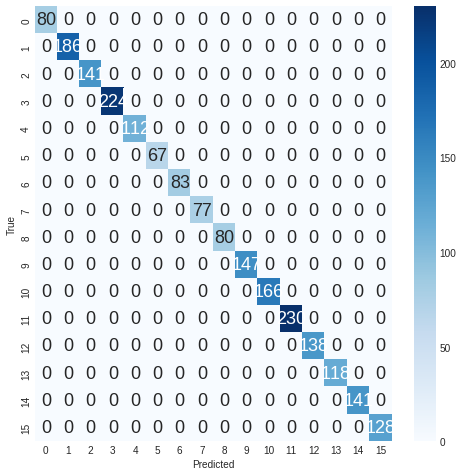

In [346]:
cm_train = confusion_matrix(y_true=train_y, y_pred=y_train_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [347]:
"""학습된 DNN Classifier 결과 확인 및 성능 평가 : Validation Data"""
y_valid_prob = best_clf_DNN(valid_x_torch).softmax(dim=1)
y_valid_pred = y_valid_prob.max(1)[1].numpy()
valid_accuracy = accuracy_score(y_pred=y_valid_pred,y_true=valid_y)

print(f"검증용 데이터셋 정확도: {valid_accuracy:.3f}")


검증용 데이터셋 정확도: 0.985


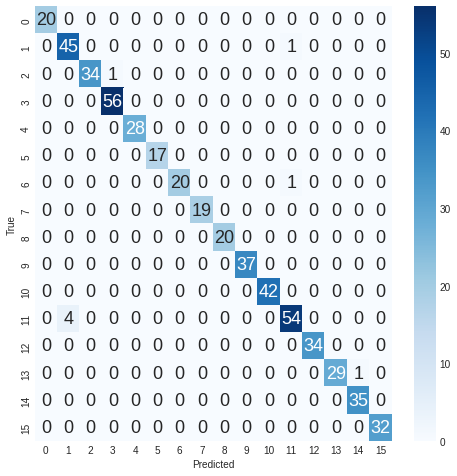

In [348]:
cm_valid = confusion_matrix(y_true=valid_y, y_pred=y_valid_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_valid, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [349]:
"""성능평가 : Testing Data"""
y_test_prob = best_clf_DNN(test_x_torch).softmax(dim=1)
y_test_pred = y_test_prob.max(1)[1].numpy()
test_accuracy = accuracy_score(y_pred=y_test_pred,y_true=test_y)

print(f"테스트용 데이터셋 정확도: {test_accuracy:.3f}")

테스트용 데이터셋 정확도: 0.989


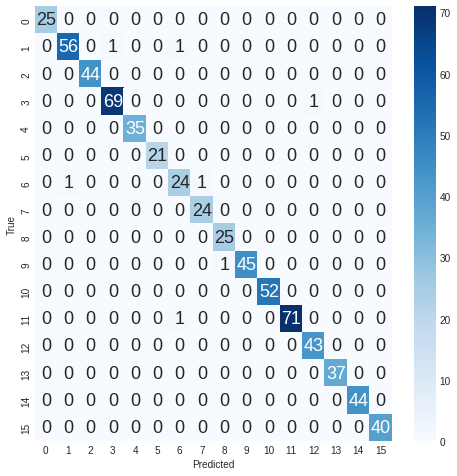

In [350]:
cm_test = confusion_matrix(y_true=test_y, y_pred=y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

>>## MLP
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
- <b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
- <b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수 ( = Epochs )<br>
- <b>alpha     </b> - Learning Rate (과적합 방지용) <br>
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

-- lbfgs: L-BFGS 준-뉴턴 방식 의 최적화 알고리즘으로, 제한된 컴퓨터 메모리를 이용하여 기존 BFGS 알고리즘을 속도면에서 개선한 알고리즘

In [351]:
''' Neural Network Classifier(분류기) 모듈 '''
from sklearn.neural_network import MLPClassifier    # MultiLayerPerceptrion

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score   # 분류
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error       # 예측

>>>### 분류기 모형

In [352]:
"""분류기 모형 설정"""
clf_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size=10,        # 몇 개의 data를 보고 학습할 것인지. batch_size
                        hidden_layer_sizes=(32), max_iter=500,                 
                        solver='adam', verbose = True, random_state = 2022)

>>>### 훈련 / 검증

In [353]:
"""학습"""
clf_mlp.fit(train_x, train_y)

Iteration 1, loss = 2.19667938
Iteration 2, loss = 1.15074377
Iteration 3, loss = 0.68886604
Iteration 4, loss = 0.46862732
Iteration 5, loss = 0.34683498
Iteration 6, loss = 0.27258671
Iteration 7, loss = 0.22244461
Iteration 8, loss = 0.18382580
Iteration 9, loss = 0.15679121
Iteration 10, loss = 0.13476195
Iteration 11, loss = 0.11714497
Iteration 12, loss = 0.10264424
Iteration 13, loss = 0.09111059
Iteration 14, loss = 0.07930134
Iteration 15, loss = 0.07092161
Iteration 16, loss = 0.06381776
Iteration 17, loss = 0.05627757
Iteration 18, loss = 0.05059454
Iteration 19, loss = 0.04488203
Iteration 20, loss = 0.04069696
Iteration 21, loss = 0.03613661
Iteration 22, loss = 0.03218911
Iteration 23, loss = 0.02919611
Iteration 24, loss = 0.02603176
Iteration 25, loss = 0.02317686
Iteration 26, loss = 0.02139337
Iteration 27, loss = 0.01887784
Iteration 28, loss = 0.01730981
Iteration 29, loss = 0.01568208
Iteration 30, loss = 0.01407548
Iteration 31, loss = 0.01295950
Iteration 32, los

MLPClassifier(batch_size=10, hidden_layer_sizes=32, max_iter=500,
              random_state=2022, verbose=True)

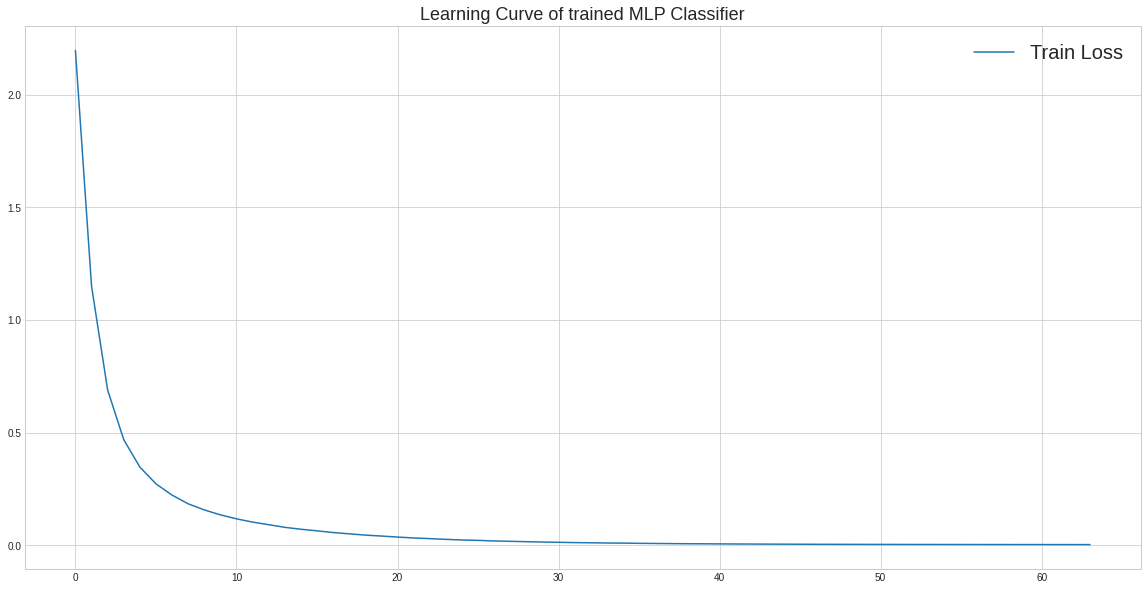

In [354]:
"""1차 평가 /w training_set"""
plt.figure(figsize=(20,10))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Classifier", fontsize=18)
plt.show()

In [355]:
train_y_pred = clf_mlp.predict(train_x)

In [356]:
cm_train = confusion_matrix (y_true=train_y, y_pred=train_y_pred)

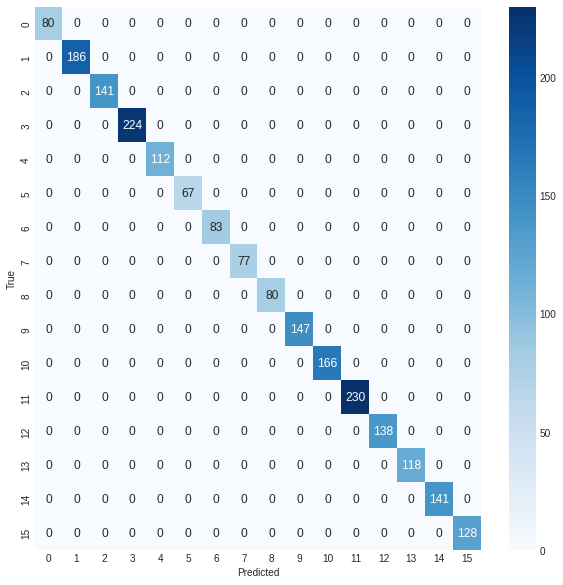

In [357]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 12}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

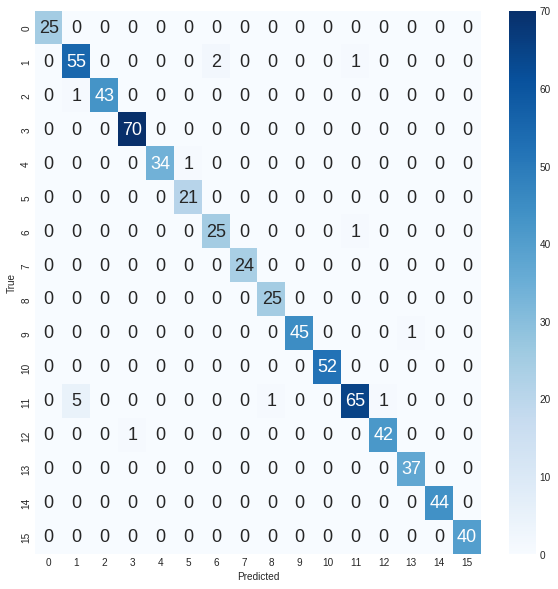

In [358]:
"""2차 평가 /w testing_set"""
test_y_pred = clf_mlp.predict(test_x)

cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [359]:
test_y_pred_proba = clf_mlp.predict_proba(test_x)
test_y_pred_proba = pd.DataFrame(test_y_pred_proba)
test_y_pred_proba.index = test_y.index.copy()

In [360]:
test_results = pd.concat([test_y_pred_proba, test_y], axis=1)
test_results.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#test_results.head()

In [361]:
print("정확도 : {:.3f}".format(accuracy_score(test_y,test_y_pred)))
print("오차 행렬 \n",confusion_matrix(test_y,test_y_pred))

print(classification_report(test_y,test_y_pred))

정확도 : 0.977
오차 행렬 
 [[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  2  0  0  0  0  1  0  0  0  0]
 [ 0  1 43  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 45  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 52  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  1  0  0 65  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.90      0.95      0.92        58


>>## Decision Tree
- 최적의 max_depth를 선택해야 함
- Validation을 사용하여 accuracy, F1-Score를 고려하여 선정

In [362]:
"""라이브러리 모형 설정"""

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix     # f1_score 는 극단적 데이터 불균형이 있을경우에 살펴봐야 함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [363]:
max_depths = list(range(1, 20)) + [None]
print(max_depths)

# 평가 지표 저장
acc_valid = []
f1_valid = []

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None]


>>>### 분류기 모형 / 훈련

In [364]:
"""1차 평가 /w training set"""
for max_depth in max_depths:
                      
    # 모델 학습
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(train_x, train_y)
    
    # validation 예측
    y_valid_pred = model.predict(valid_x)
    
    # 모델 평가 결과 저장
    acc = accuracy_score(valid_y, y_valid_pred)
    #f1 = f1_score(valid_y, y_valid_pred,average='macro')
    
    acc_valid.append(acc)   # 덮어씌워지므로 apped
    #f1_valid.append(f1)     # append

In [365]:
# Decision Tree depth list
xticks = list(map(str, max_depths))     # 스트링을 그래프의 문자열로 사용하려면.
print(xticks)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'None']


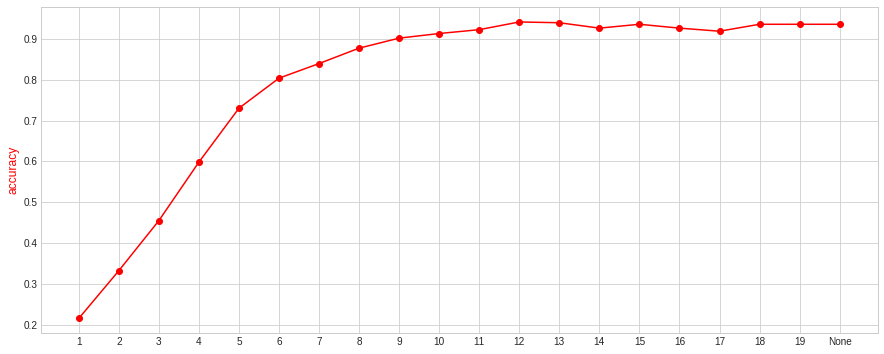

In [366]:
# Decision Tree depth에 따른 accuracy
fig, ax = plt.subplots(figsize=(15, 6))
#fig.subplots_adjust(right=0.75)

ax.plot(range(len(max_depths)), acc_valid, color='red', marker='o')
ax.set_ylabel('accuracy', color='red', fontsize=12)

# ax2 = ax.twinx()
# ax2.plot(range(len(max_depths)), f1_valid, color='blue', marker='s')
# ax2.set_ylabel('f1', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()

In [367]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

>>>### 검증

In [368]:
"""1차 평가 /w test_set"""
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
acc = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred, average='macro')

print('- Accuracy (Test) : {:.3}'.format(acc))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.876
- F1 score (Test) : 0.885


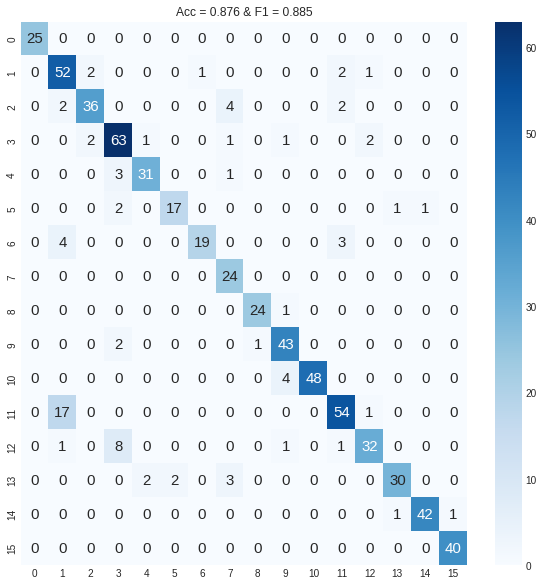

In [369]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(acc, f1))
plt.show()

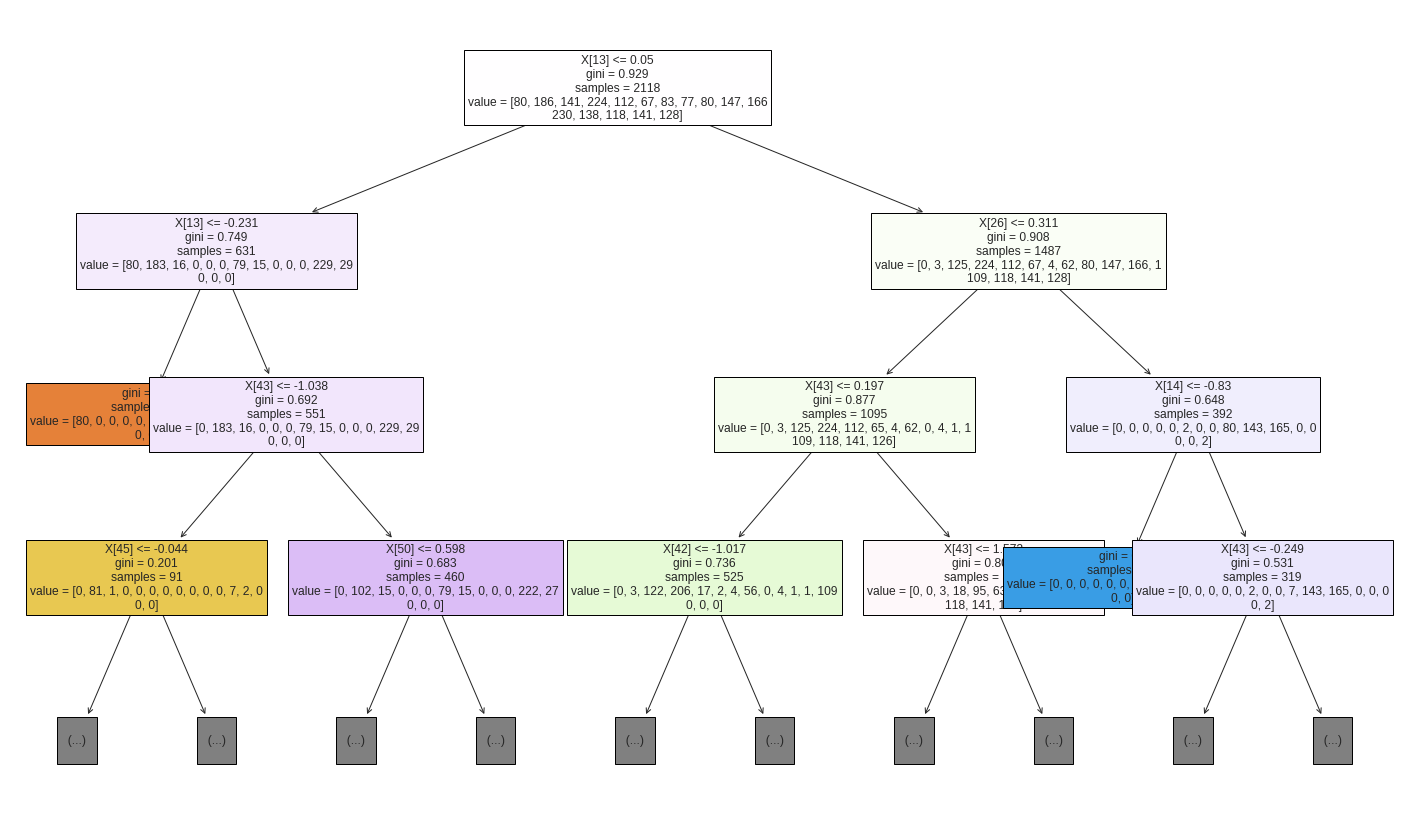

In [370]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree=model,max_depth=3,feature_names=None,label='all', filled=True,fontsize=12)
plt.show()
# Samples = 3  샘플의 개수
# Values = [2,1]     색상

In [371]:
# 변수 중요도
importances = model.feature_importances_

# 내림차순으로 정렬하기 위한 index
index = np.argsort(importances)[::-1]

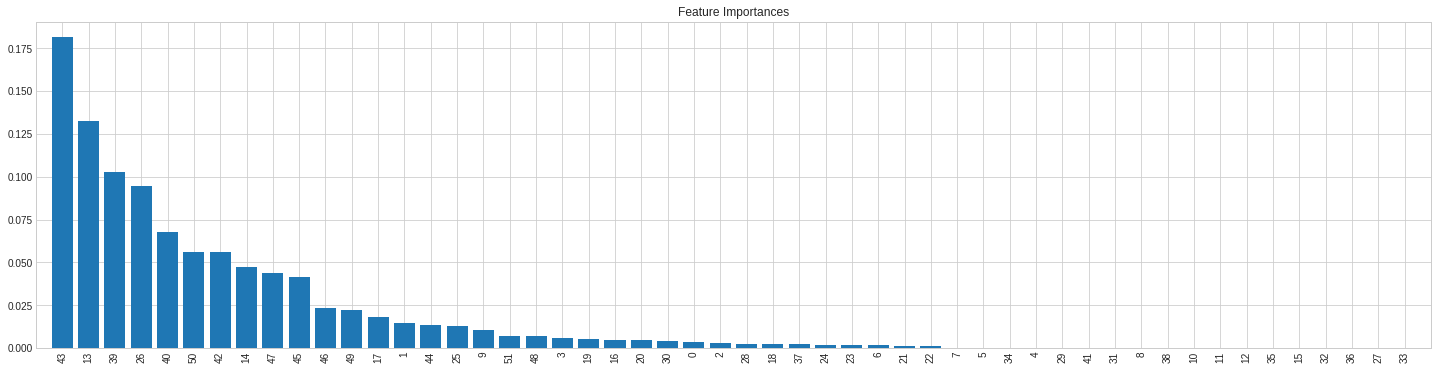

In [372]:
plt.figure(figsize=(25, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]),
        importances[index],
        align='center')
plt.xticks(range(x.shape[1]), x.columns[index], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

>>## KNN
grid search의 대상이 되는 파라미터
- n_neighbors: 근접이웃 개수
- weights: weight for voting
- metric: 거리 계산 방법

In [373]:
""" 모델 생성, 학습, 평가 """
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix    # 평가법은 acc,f1,confusion matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import VALID_METRICS
from sklearn.metrics import SCORERS

# parameter grid 지정                 5-fold / 10-fold 주로 사용
# dictioanry 안의 list 형태로 넣어서 구성

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine', 'euclidean', 'manhattan']
}

>>>### 분류기 모형 / 훈련

In [374]:
""" Grid Search CV 모델 구성: cv = 10 """

SCORERS.keys()
model = KNeighborsClassifier()
model_cv = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)  # 모든것을 고려하겠다...

                        
model_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [375]:
results = model_cv.cv_results_
params = results['params']
mean_score = results['mean_test_score']
std_score =results['std_test_score']

In [376]:
params = ['_'.join(str(x) for x in param.values()) for param in params]
params[:5]

['cosine_1_uniform',
 'cosine_1_distance',
 'cosine_3_uniform',
 'cosine_3_distance',
 'cosine_5_uniform']

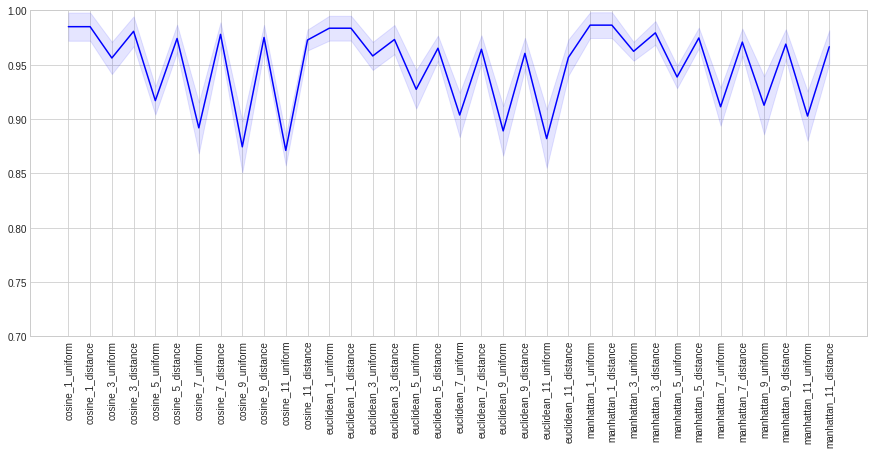

In [377]:
plt.figure(figsize=(15, 6))
plt.fill_between(range(len(params)), mean_score - std_score, mean_score + std_score, alpha=0.1, color='blue')
plt.plot(range(len(params)), mean_score, color='blue')
plt.ylim([0.7, 1.0])
plt.xticks(range(len(params)), params, rotation=90)
plt.show()

In [378]:
# Best parameter 출력
print('Best parameters (Grid Search) \n >> ', model_cv.best_params_)

Best parameters (Grid Search) 
 >>  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [379]:
# Best 모델 찾기
model = model_cv.best_estimator_
model                                         # weight default와 같아서 안보임.

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

>>>### 검증

In [380]:
# 에측 결과 산출
y_test_pred = model.predict(test_x)

# Confusion Matrix
cm = confusion_matrix(test_y, y_test_pred)
cm = pd.DataFrame(cm)

# Accuracy, F1-Score
acc_knn = accuracy_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred,average='macro')

print('- Accuracy (Test) : {:.3}'.format(acc_knn))
print('- F1 score (Test) : {:.3}'.format(f1))

- Accuracy (Test) : 0.989
- F1 score (Test) : 0.992


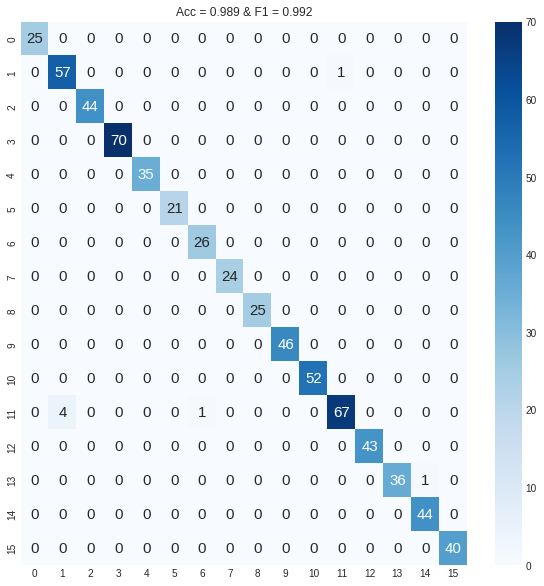

In [381]:
# 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(data=cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.title('Acc = {:.3f} & F1 = {:.3f}'.format(acc_knn, f1))
plt.show()

>>## **Ensemble**

>>>### 분류기 모형 / 훈련

In [382]:
from sklearn.ensemble import AdaBoostClassifier

params = {"n_estimators" : [100, 200, 400], "learning_rate" : [0.01, 0.5, 1.0]}

# model define
model_Ada = AdaBoostClassifier()

# model train with gridsearchCV    # CV = CrossValidation    5개의 데이터셑으로 분할하고, 4번 훈련, 1번 test 수행 
grid_model_Ada = GridSearchCV(model_Ada, param_grid = params, cv = 5, refit = True, return_train_score= True)
grid_model_Ada.fit(train_x, train_y)

# print results
result = pd.DataFrame(grid_model_Ada.cv_results_)
best_model_Ada = grid_model_Ada.best_estimator_

In [383]:
print("CV score")

# DataFrame으로 만든 result중에 일부 컬럼만 출력함 
result[["params"] + ["split" + str(i) + "_test_score" for i in range(5)] + ["std_test_score", "mean_test_score"]]

CV score


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_test_score,mean_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 100}",0.358491,0.318396,0.356132,0.373522,0.323877,0.021296,0.346084
1,"{'learning_rate': 0.01, 'n_estimators': 200}",0.452830,0.431604,0.408019,0.408983,0.399527,0.019475,0.420193
2,"{'learning_rate': 0.01, 'n_estimators': 400}",0.464623,0.457547,0.441038,0.378251,0.413712,0.031678,0.431034
3,"{'learning_rate': 0.5, 'n_estimators': 100}",0.556604,0.511792,0.540094,0.574468,0.505910,0.026064,0.537774
4,"{'learning_rate': 0.5, 'n_estimators': 200}",0.629717,0.566038,0.658019,0.609929,0.588652,0.031881,0.610471
5,"{'learning_rate': 0.5, 'n_estimators': 400}",0.702830,0.667453,0.698113,0.706856,0.716312,0.016551,0.698313
6,"{'learning_rate': 1.0, 'n_estimators': 100}",0.346698,0.306604,0.334906,0.328605,0.333333,0.013140,0.330029
7,"{'learning_rate': 1.0, 'n_estimators': 200}",0.346698,0.306604,0.334906,0.328605,0.333333,0.013140,0.330029
8,"{'learning_rate': 1.0, 'n_estimators': 400}",0.346698,0.306604,0.334906,0.328605,0.333333,0.013140,0.330029


>>>### 검증

In [384]:
print("Adaboost")
print("Best Parameter : " + str(grid_model_Ada.best_params_))

# predict
pred = best_model_Ada.predict(test_x)

# pandas의 cross table  --> heatmap과 같아, accuracy 산정 활용
tab = pd.crosstab(test_y, pred, rownames = ["real"], colnames = ["pred"])
print(tab)

# Acc 계산/출력
hit_count=0

for i in range(pd.Series(pred).nunique()):
  hit_count = hit_count + tab.iloc[i,i]

Acc_Ensemble =  hit_count / len(test_x)

print("Acc : " + str( Acc_Ensemble))      


Adaboost
Best Parameter : {'learning_rate': 0.5, 'n_estimators': 400}
pred  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
real                                                            
0     25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1      0  43   6   0   0   0   3   0   0   0   0   4   2   0   0
2      0   0  32  11   0   0   0   0   0   0   0   0   1   0   0
3      0   0   0  67   0   0   0   0   0   0   0   0   3   0   0
4      0   0   0   4  30   0   0   0   0   0   0   0   0   1   0
5      0   0   0   0   0  11   0   0   0   0   0   0   0  10   0
6      0   1   0   0   0   0  15   0   0   0   0  10   0   0   0
7      0   0  10   0   0   0   1  11   0   0   0   2   0   0   0
8      0   0   0   0   0   0   0   0  14   9   2   0   0   0   0
9      0   0   0   1   0   0   0   0   0  40   5   0   0   0   0
10     0   0   0   0   0   0   0   0   0  11  41   0   0   0   0
11     0  25   1   0   0   0  10   2   0   0   0  34   0   0   0
12     0   0   0  12

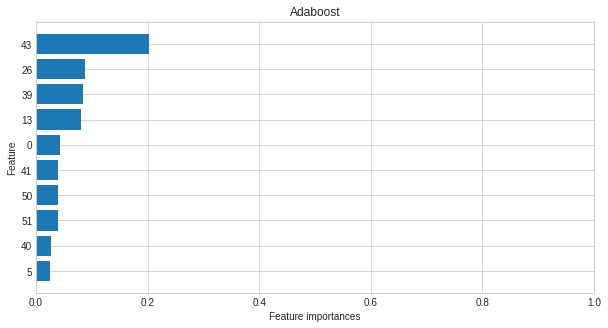

In [385]:
# visualie the feature importance

plt.figure(figsize = (10, 5))

plt.title("Adaboost")
fi = best_model_Ada.feature_importances_
idx = (-fi).argsort()[0:10]
fi = fi[idx]
idx = train_x.columns[idx]
plt.barh(range(10), fi[::-1], align='center')
plt.xlim(0, 1)
plt.yticks(range(10), idx[::-1])
plt.xlabel('Feature importances', size=10)
plt.ylabel('Feature', size=10)

plt.show() 

# **결과**
---
>Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교

In [386]:
"""Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교"""
print(f"DNN: {test_accuracy:.3f}, MLP:{accuracy_score(test_y,test_y_pred):.3f}, DTree:{acc:.3f}, KNN:{acc_knn:.3f}, Ensemble: {Acc_Ensemble:.3f}")

# No Data Augmentation
# DNN: 0.902, MLP:0.872, DTree:0.722, KNN:0.812, Ensemble: 0.361

# Data Augmentation
# DNN: 0.892, MLP:0.847, DTree:0.683, KNN:0.832, Ensemble: 0.628  (jittering sigma = 0.05,  MagWarp = 0.2)
# DNN: 0.982, MLP:0.980, DTree:0.887, KNN:0.980, Ensemble: 0.673  (jittering sigma = 0.005, MagWarp = 0.2)
# DNN: 0.975, MLP:0.982, DTree:0.887, KNN:0.960, Ensemble: 0.693  (jittering sigma = 0.005, MagWarp = 0.1)
# DNN: 0.982, MLP:0.987, DTree:0.922, KNN:0.960, Ensemble: 0.749  (jittering sigma = 0.005, MagWarp = 0.05)
# DNN: 0.987, MLP:0.987, DTree:0.920, KNN:0.965, Ensemble: 0.349  (jittering sigma = 0.005, MagWarp = 0.02)
# DNN: 0.996, MLP:0.991, DTree:0.877, KNN:0.998, Ensemble: 0.670  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.1)
# DNN: 0.974, MLP:0.977, DTree:0.875, KNN:0.989, Ensemble: 0.631  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.1,  Combination = (0.1,0.01))
# DNN: 0.988, MLP:0.977, DTree:0.896, KNN:0.989, Ensemble: 0.727  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.05, Combination = (0.1,0.01))
# DNN: 0.989, MLP:0.977, DTree:0.876, KNN:0.989, Ensemble: 0.684  (jittering sigma = 0.005, MagWarp = 0.05, Scaling = 0.05, Combination = (0.05,0.01))




DNN: 0.989, MLP:0.977, DTree:0.876, KNN:0.989, Ensemble: 0.684
